In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin.copy()
df_1.drop(columns=['RRU.PrbAvailDl', 'RRU.PrbAvailUl','RRU.PrbTotUl','RRU.PrbTotDl','RRC.ConnMax'], inplace=True)
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.set_index('datetime_column', inplace=True)
df_1.drop(columns=['timestamp'], inplace=True)

In [4]:
# Filter for specific columns and their correlations
corr_matrix = df_1.corr(numeric_only=True)[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']]
display(corr_matrix)
filtered_corr = corr_matrix[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']]

# Find columns where correlation with 'RRU.PrbUsedDl' or 'RRU.PrbUsedUl' is greater than 0.5
columns_with_high_corr = filtered_corr.index[(filtered_corr['RRU.PrbUsedDl'] > 0.5) & (filtered_corr['RRU.PrbUsedUl'] > 0.5)].tolist()

print("higher correlation > 0.5:\n", columns_with_high_corr)

,RRU.PrbUsedDl,RRU.PrbUsedUl
DRB.UEThpDl,0.609351,0.655949
DRB.UEThpUl,0.551258,0.604384
RRU.PrbUsedDl,1.000000,0.976418
RRU.PrbUsedUl,0.976418,1.000000
RRU.MaxLayerDlMimo,0.564125,0.475535
CARR.AverageLayersDl,0.564125,0.475535
RRC.ConnMean,0.546933,0.582082
QosFlow.TotPdcpPduVolumeUl,0.551093,0.604202
QosFlow.TotPdcpPduVolumeDl,0.609268,0.655836
PEE.AvgPower,0.781520,0.832680


higher correlation > 0.5:
 ['DRB.UEThpDl', 'DRB.UEThpUl', 'RRU.PrbUsedDl', 'RRU.PrbUsedUl', 'RRC.ConnMean', 'QosFlow.TotPdcpPduVolumeUl', 'QosFlow.TotPdcpPduVolumeDl', 'PEE.AvgPower']


In [5]:
seleted_columns = columns_with_high_corr
df_1= df_1[seleted_columns].copy()
df_1

,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRC.ConnMean,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower
datetime_column,,,,,,,,
2022-12-31 16:00:00,0.278192,0.278192,81.459016,81.459016,1.786885,277.868853,277.868853,281.947679
2022-12-31 16:00:00,0.146310,0.146310,50.000000,50.000000,0.516667,146.050000,146.050000,180.817352
2022-12-31 16:00:00,0.220303,0.220303,64.300000,64.300000,1.450000,220.083333,220.083333,230.893458
2022-12-31 16:00:00,0.186428,0.186428,80.900000,80.900000,1.916667,186.083333,186.083333,279.584476
2022-12-31 16:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
...,...,...,...,...,...,...,...,...
2023-01-07 15:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
2023-01-07 15:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
2023-01-07 15:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000


In [6]:
try:
    df_2= df_1.resample('T').mean().drop(columns=['Viavi.Cell.Name'])
except:
    df_2= df_1.resample('T').mean()
df=df_2.astype(float).copy()
df

,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRC.ConnMean,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower
datetime_column,,,,,,,,
2022-12-31 16:00:00,0.112853,0.109073,41.647609,40.984468,0.923145,108.877027,112.657593,163.482931
2022-12-31 16:01:00,0.100812,0.096750,42.121474,41.068910,0.923397,96.565170,100.627194,153.417886
2022-12-31 16:02:00,0.106379,0.102369,41.851282,40.958333,0.921795,102.151550,106.161736,158.808699
2022-12-31 16:03:00,0.100694,0.098010,42.577885,41.491026,0.922115,97.808665,100.492253,157.386986
2022-12-31 16:04:00,0.109902,0.107143,43.626603,42.665705,0.921795,106.939023,109.697512,167.089184
...,...,...,...,...,...,...,...,...
2023-01-07 15:55:00,0.110139,0.107350,42.102244,41.227244,0.922115,107.129670,109.918532,164.456731
2023-01-07 15:56:00,0.099864,0.098178,40.426282,39.726282,0.923077,97.959150,99.644908,159.064446
2023-01-07 15:57:00,0.114258,0.110941,40.190705,40.190705,0.923077,110.729551,114.046510,161.020629


In [7]:
n = len(df)
train_df =df[0:int(n*0.9048)]
#val_df = df['2023-01-07 00:00:00':'2023-01-07 01:59:00']
val_df = df[int(n*0.9048):]
test_df = df[int(n*0.9048):]

num_features = df.shape[1]

In [8]:
import numpy as np
import pandas as pd

def standardize_data(data, isoutput=True, column_output=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], train_df=train_df):
    if isoutput:
        mean = train_df[column_output].mean().values
        std = train_df[column_output].std().values
    else:
        mean = train_df.mean().values
        std = train_df.std().values

    # Reshape for broadcasting with 2D matrix
    mean = mean.reshape(1, -1)
    std = std.reshape(1, -1)

    return (data - mean) / std

def inverse_standardize_data(data, isoutput=True, column_output=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], train_df=train_df):
    if isoutput:
        mean = train_df[column_output].mean().values
        std = train_df[column_output].std().values
    else:
        mean = train_df.mean().values
        std = train_df.std().values

    # Reshape for broadcasting with 2D matrix
    mean = mean.reshape(1, -1)
    std = std.reshape(1, -1)

    return (data * std) + mean


In [9]:
train_scaled = standardize_data(train_df, isoutput=False)
val_scaled= standardize_data(val_df, isoutput=False)
test_scaled= standardize_data(test_df, isoutput=False)

In [10]:
# Parameter windowing
input_width = 60*2
label_width = 60
shift = label_width
total_window_size = input_width + shift
OUT_STEPS = label_width
# Definisikan irisan untuk input dan label
input_slice = slice(0, input_width)
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)

def make_windows(data_x,data_y, total_window_size, input_slice, labels_slice):
    x = []
    y = []
    for i in range(len(data_x) - total_window_size + 1):
        window_x = data_x[i:i+total_window_size]
        x.append(window_x[input_slice])

    for i in range(len(data_y) - total_window_size + 1):
        window_y= data_y[i:i+total_window_size]
        y.append(window_y[labels_slice])

    return np.array(x), np.array(y)

# Membuat windowed dataset untuk set pelatihan, validasi, dan pengujian

x_train_scaled, y_train_scaled = make_windows(train_scaled.to_numpy(), train_scaled[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy(),total_window_size, input_slice, labels_slice)
x_val_scaled, y_val_scaled = make_windows(val_scaled.to_numpy(), val_scaled[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy(),total_window_size, input_slice, labels_slice)
x_test_scaled, y_test_scaled = make_windows(test_scaled.to_numpy(),test_scaled[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].to_numpy(), total_window_size, input_slice, labels_slice)

# Verifikasi bentuk windowed dataset
print("x_train_scaled shape:", x_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("x_val_scaled shape:", x_val_scaled.shape)
print("y_val_scaled shape:", y_val_scaled.shape)
print("x_test_scaled shape:", x_test_scaled.shape)
print("y_test_scaled shape:", y_test_scaled.shape)


x_train_scaled shape: (8941, 120, 8)
y_train_scaled shape: (8941, 60, 2)
x_val_scaled shape: (781, 120, 8)
y_val_scaled shape: (781, 60, 2)
x_test_scaled shape: (781, 120, 8)
y_test_scaled shape: (781, 60, 2)


In [11]:
import tensorflow as tf
nama_file='10a_20240720_2339.hdf5'
# Step 1: Load the model
model = tf.keras.models.load_model('%s'%nama_file)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 120)          61920     
                                                                 
 lstm_1 (LSTM)               (None, 120, 120)          115680    
                                                                 
 lstm_2 (LSTM)               (None, 120, 120)          115680    
                                                                 
 lstm_3 (LSTM)               (None, 120)               115680    
                                                                 
 dense (Dense)               (None, 120)               14520     
                                                                 
 reshape (Reshape)           (None, 60, 2)             0         
                                                                 
Total params: 423,480
Trainable params: 423,480
Non-trai

In [13]:
train_predictions = model.predict(x_train_scaled[slice(None,None,label_width), :, :])
predictions_reshaped = train_predictions.reshape(-1, 2)
predictions_unscaled = inverse_standardize_data(predictions_reshaped, isoutput=True)
train_predictions_df= pd.DataFrame(predictions_unscaled, columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], index=train_df[input_width:].index)
train_predictions_df

5/5 [==============================] - 3s 14ms/step


,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2022-12-31 18:00:00,45.344425,43.532272
2022-12-31 18:01:00,43.077184,41.406363
2022-12-31 18:02:00,43.285938,41.782016
2022-12-31 18:03:00,46.014401,44.479096
2022-12-31 18:04:00,46.053580,44.609181
...,...,...
2023-01-06 23:55:00,37.395175,36.398335
2023-01-06 23:56:00,39.409215,38.305798
2023-01-06 23:57:00,43.301131,41.886641


In [14]:
train_df[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']][120:]

,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2022-12-31 18:00:00,45.412179,41.999679
2022-12-31 18:01:00,43.582372,42.619872
2022-12-31 18:02:00,40.982051,40.457051
2022-12-31 18:03:00,49.215705,47.155449
2022-12-31 18:04:00,42.306410,41.531731
...,...,...
2023-01-06 23:55:00,36.615064,35.745833
2023-01-06 23:56:00,38.994551,37.724038
2023-01-06 23:57:00,44.094551,41.540064


In [15]:
val_predictions = model.predict(x_val_scaled[slice(None,None,label_width), :, :])
predictions_reshaped = val_predictions.reshape(-1, 2)
predictions_unscaled = inverse_standardize_data(predictions_reshaped, isoutput=True)
val_predictions_df= pd.DataFrame(predictions_unscaled, columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], index=val_df[input_width:].index)
val_predictions_df

1/1 [==============================] - 0s 37ms/step


,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2023-01-07 02:00:00,44.371271,43.138041
2023-01-07 02:01:00,40.232504,39.317226
2023-01-07 02:02:00,39.451113,38.591248
2023-01-07 02:03:00,40.718112,39.812837
2023-01-07 02:04:00,40.726064,39.816002
...,...,...
2023-01-07 15:55:00,45.220411,44.003602
2023-01-07 15:56:00,45.313845,44.137639
2023-01-07 15:57:00,43.500926,42.481214


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
train_actual_df = train_df[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']][input_width:]
val_actual_df = val_df[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']][input_width:]

# Calculate metrics for Training
train_mae = mean_absolute_error(train_actual_df, train_predictions_df)
train_mse = mean_squared_error(train_actual_df, train_predictions_df)
train_rmse = np.sqrt(train_mse)
train_mape = np.mean(np.abs((train_actual_df - train_predictions_df) / train_actual_df)) * 100

# Calculate metrics for Validation
val_mae = mean_absolute_error(val_actual_df, val_predictions_df)
val_mse = mean_squared_error(val_actual_df, val_predictions_df)
val_rmse = np.sqrt(val_mse)
val_mape = np.mean(np.abs((val_actual_df - val_predictions_df) / val_actual_df)) * 100

# Print the metrics
print("Training Metrics:")
print(f"MAE: {train_mae}, MAPE %: {train_mape}, MSE: {train_mse}, RMSE: {train_rmse}")

print("\nValidation Metrics:")
print(f"MAE: {val_mae}, MAPE %: {val_mape}, MSE: {val_mse}, RMSE: {val_rmse}")

Training Metrics:
MAE: 1.4688057409276913, MAPE %: 3.4585156923698026, MSE: 3.4223000027958186, RMSE: 1.849945945911885

Validation Metrics:
MAE: 2.612934534291651, MAPE %: 6.156313036691871, MSE: 10.629507516434181, RMSE: 3.260292550743596


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_predictions(val_df, x_val_scaled, model, val_scaled, input_width, label_width, num_features):
    num_output = 2


    # Predictions for validation data
    val_predictions = model.predict(x_val_scaled[slice(None,None,label_width), :, :])
    predictions_reshaped = val_predictions.reshape(-1, num_output)
    predictions_unscaled = inverse_standardize_data(predictions_reshaped, isoutput=True)
    val_predictions_df = pd.DataFrame(predictions_unscaled, columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], index=val_df.index)

    # Generate new predictions
    val_new = val_scaled.tail(input_width).to_numpy()
    val_new = val_new.reshape(1, -1, num_features)
    generate_predictions = model.predict(val_new)
    generate_predictions = inverse_standardize_data(generate_predictions.reshape(-1, num_output), isoutput=True)
    generate_predictions_df = pd.DataFrame(generate_predictions, columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'], index=val_df.tail(label_width).index + pd.DateOffset(hours=1))

    # Combine predictions
    all_predictions = pd.concat([val_predictions_df, generate_predictions_df], axis=0)
    inputs_graph = val_df[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].iloc[-label_width * 3:-label_width]
    labels_graph = val_df[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].iloc[-label_width:]
    predictions_graph = all_predictions.loc[labels_graph.index]
    new_predictions_graph = all_predictions.loc[generate_predictions_df.index]

    # Plotting
    plt.figure(figsize=(16, 8))
    for n, feature in enumerate(all_predictions.columns):
        plt.subplot(len(all_predictions.columns), 1, n + 1)
        plt.plot(inputs_graph.index, inputs_graph[feature], label='Inputs for orange', marker='.', zorder=-100, markersize=5)
        plt.plot(labels_graph.index, labels_graph[feature], label='actual output for orange and inputs for red', marker='.', zorder=-100, c='#2ca02c')
        plt.scatter(predictions_graph.index, predictions_graph[feature], marker='X', edgecolors='k', label='Prediction', c='#ff7f0e', s=int(32 * 1.5))
        plt.scatter(new_predictions_graph.index, new_predictions_graph[feature], marker='+', label='New prediction', c='#FF012D', s=int(32 * 1.5))
        plt.ylabel(feature)
        plt.legend()

    plt.subplots_adjust(hspace=0.2, top=1)
    plt.show()


1/1 [==============================] - 0s 25ms/step


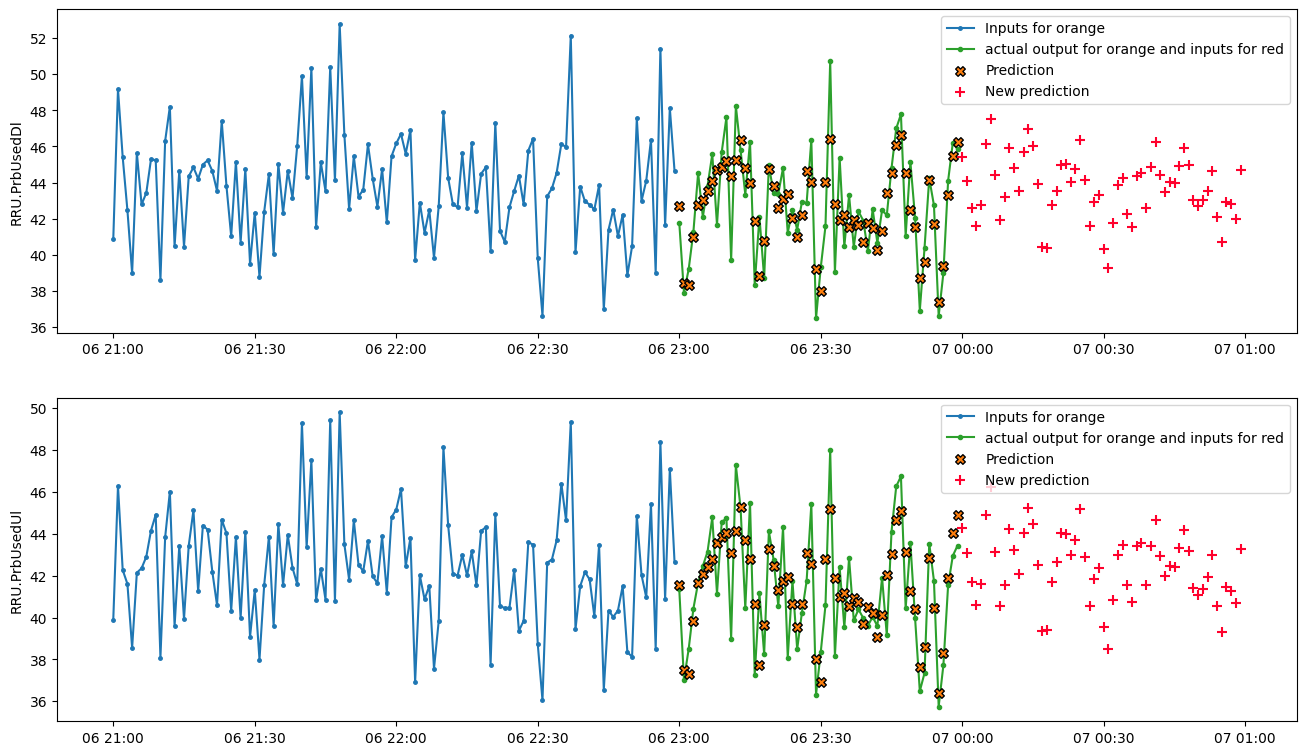

In [18]:
plot_predictions(train_df[input_width:], x_train_scaled, model, train_scaled, input_width, label_width, num_features)

1/1 [==============================] - 0s 27ms/step


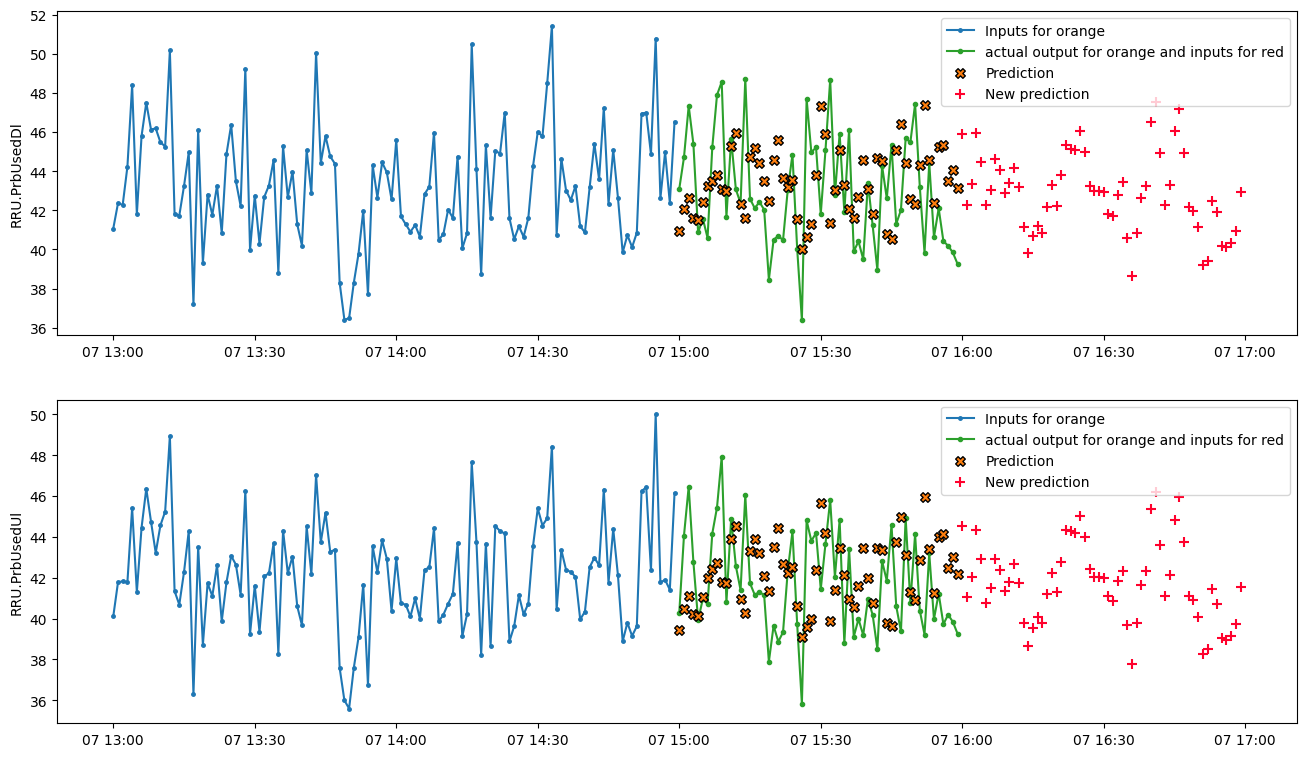

In [19]:
plot_predictions(val_df[input_width:], x_val_scaled, model, val_scaled, input_width, label_width, num_features)